# Ultimate Technologies Inc. Take-Home Challenge

created on Google Colab.

## Importing Libraries & Load Data

In [1]:
# Import Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Import Modeling Libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from scipy.stats import ttest_ind

In [20]:
# Import Additional Libraries
from copy import deepcopy
from matplotlib.dates import HourLocator

In [3]:
# Accessing Google Drive by mounting it locally
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Location on Google Drive
repo = 'challenge_ultimate'
%cd /content/drive/MyDrive/colab_notebooks/GitHub/{repo}/

# Load data files into pandas
logins = pd.read_json('logins.json',convert_dates=True)
ultimate = pd.read_json('ultimate_data_challenge.json')

/content/drive/MyDrive/colab_notebooks/GitHub/challenge_ultimate


In [5]:
# Unmount Google Drive.
drive.flush_and_unmount()

In [10]:
# Creating a Counter for logins by 15-minute intervals.
logins_count = deepcopy(logins)
logins_count["count"] = 1
logins_count = logins_count.set_index("login_time")
logins_count_15min = logins_count.groupby(pd.Grouper(freq="15Min")).sum()
logins_count_15min.index.name = "DateTime"

In [13]:
# Creating a Counter for logins by day intervals.
logins_count_day = logins_count_15min.groupby(logins_count_15min.index.date).mean()
logins_count_day = logins_count_day[1 : -1]
logins_count_day.index.name = "Date"

Text(0.5, 1.0, 'Login rate by day')

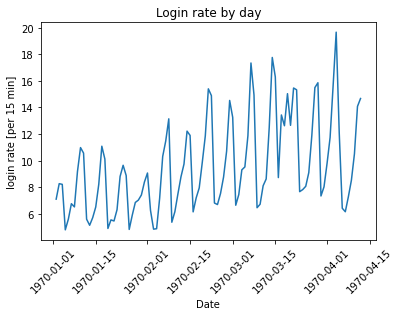

In [14]:
# Creating plot of login count by day.
logins_count_day.plot(y="count", rot=45, legend=None)
plt.ylabel("login rate [per 15 min]")
plt.title("Login rate by day")

Text(0.5, 1.0, 'Login Count - Day of Week')

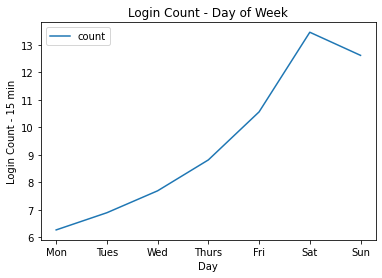

In [22]:
# Plot Mean Count by Day of the Week
logins_count_week = logins_count_15min["1970-01-02" : "1970-04-12"].groupby(logins_count_15min["1970-01-02" : "1970-04-12"].index.weekday).mean()
logins_count_week.index.name = "Day"

logins_count_week.plot(y="count")
plt.xticks(ticks=range(7), labels=["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"])
plt.ylabel("Login Count - 15 min")
plt.title("Login Count - Day of Week")

Text(0.5, 1.0, 'Login Count - Hour')

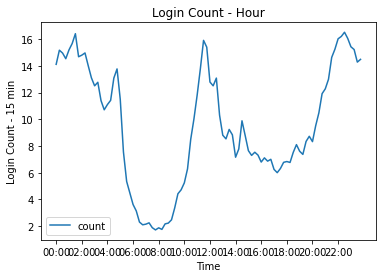

In [23]:
# Plot Mean Login Count by Hour
logins_count_ave_day = logins_count_15min.groupby(logins_count_15min.index.time).mean()
logins_count_ave_day.index.name = "Time"

logins_count_ave_day.plot(y="count")
plt.xticks([7200 * h for h in range(12)])
plt.ylabel("Login Count - 15 min")
plt.title("Login Count - Hour")